# MNIST Data
I'll make a t-SNE plot using the MNIST data as a dataframe. I'm loading the data using clustergrammer. 

In [1]:
from clustergrammer import Network
net = Network()

## Load MNIST Data

In [2]:
# get dataframe 
filename = 'mnist.txt'
net.load_file(filename)
net.swap_nan_for_zero()
inst_df = net.dat_to_df()
df = inst_df['mat']

In [3]:
# export dataframe into numpy matrix for tsne
tuple_cols = df.columns.tolist()
rows = df.index.tolist()
mat = df.values

# color_dict 
num_dict = {'Zero':0, 'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9}

# get simple column names
right_cmap = []
left_cmap = []
for inst_col in tuple_cols:
    num_name = inst_col[1].split(': ')[1]
    num_num = num_dict[num_name]
    right_cmap.append(num_num)
    
    if num_num == 6:
        left_cmap.append(1)
    else:
        left_cmap.append(0)

# t-SNE plot of MNIST Data

I'll use the example from the Visualizing with t-SNE notebook

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne

def make_tsne(mat, cmap_left=None, cmap_right=None):
    # the matrix needs to be transposed in order to cluster the numbers
    x_data = mat.transpose()

    # convert image data to float64 matrix. float64 is need for bh_sne
    x_data = np.asarray(x_data).astype('float64')

    # perform t-SNE embedding, lowered perplexity
    vis_data = bh_sne(x_data, perplexity=5)

    # plot the result
    vis_x = vis_data[:, 0]
    vis_y = vis_data[:, 1]

    fig, axarr = plt.subplots(ncols=2, figsize=(10,5))
    
    if cmap_left == None:
        axarr[0].scatter(vis_x, vis_y)
    else:
        axarr[0].scatter(vis_x, vis_y, c=cmap_left, cmap=plt.cm.get_cmap('prism',len(cmap_left)))
    
    if cmap_right == None:
        axarr[1].scatter(vis_x, vis_y)
    else:
        axarr[1].scatter(vis_x, vis_y, c=cmap_right, cmap=plt.cm.get_cmap('prism',len(cmap_right)))        

    plt.show()

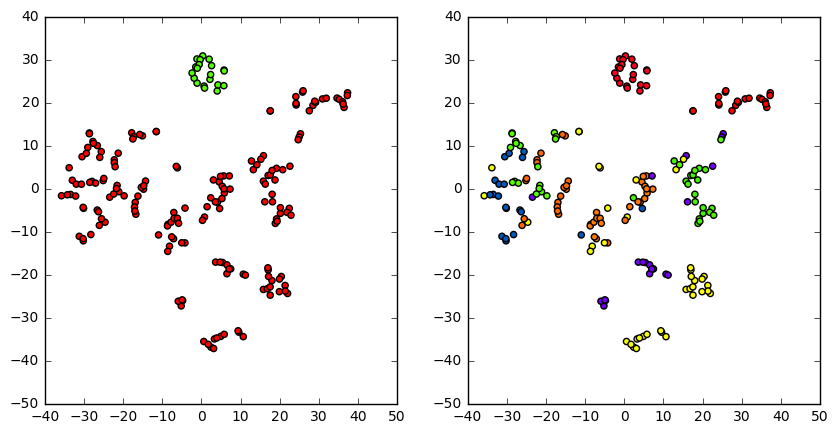

In [5]:
make_tsne(mat, left_cmap, right_cmap)

The above plot is showing a t-SNE visualizations with sixes highlighted on the left and each number highlighted on the right

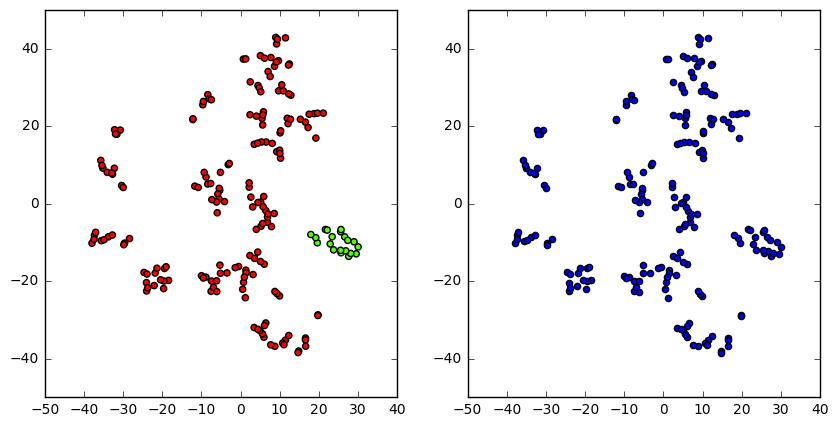

In [6]:
make_tsne(mat, cmap_left=left_cmap)

# Load CST Data
Now that I have a function that takes a matrix and y-labels I'll plot the CST PTM data

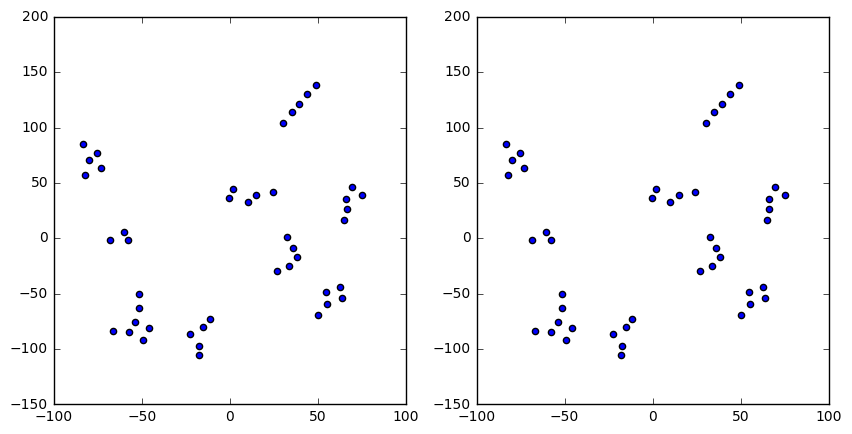

In [7]:
filename = 'lung_cellline_TMT_phospho_combined_ratios.tsv'
# get dataframe 
net.load_file(filename)
net.swap_nan_for_zero()
# do not filter data
# net.filter_N_top('row', 100, 'sum')
inst_df = net.dat_to_df()
df = inst_df['mat']

# export dataframe into numpy matrix for tsne
tuple_cols = df.columns.tolist()
rows = df.index.tolist()
mat = df.values
df.shape

make_tsne(mat)

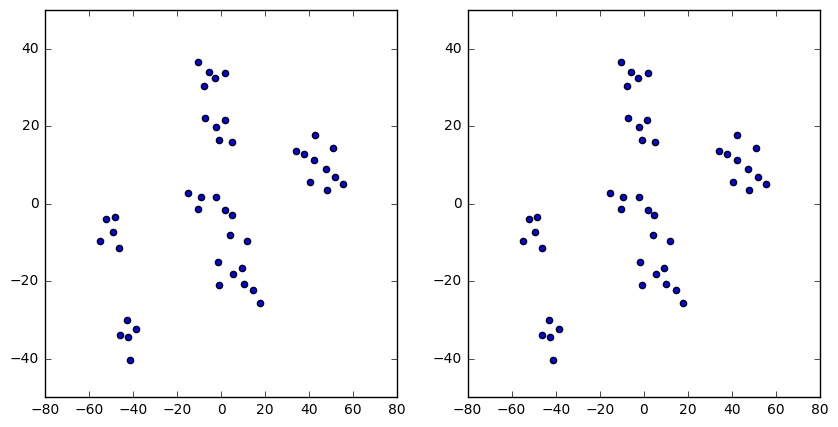

In [8]:
filename = 'lung_cellline_TMT_phospho_combined_ratios.tsv'
# get dataframe 
net.load_file(filename)
net.swap_nan_for_zero()
# do not filter data
net.filter_N_top('row', 100, 'sum')
inst_df = net.dat_to_df()
df = inst_df['mat']

# export dataframe into numpy matrix for tsne
tuple_cols = df.columns.tolist()
rows = df.index.tolist()
mat = df.values
df.shape

make_tsne(mat)

# Scikit Learn
Working on using Scikit learn's tsne implementation

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)


In [17]:

tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)


ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


(-21.945755256846184,
 21.871519327713344,
 -16.674482920279615,
 16.649846934750062)

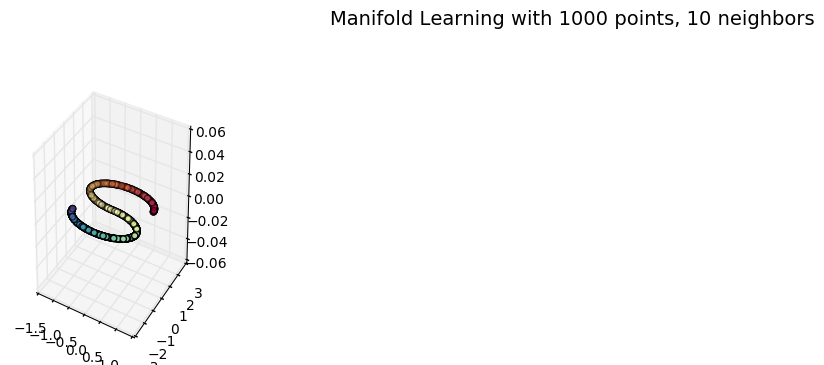

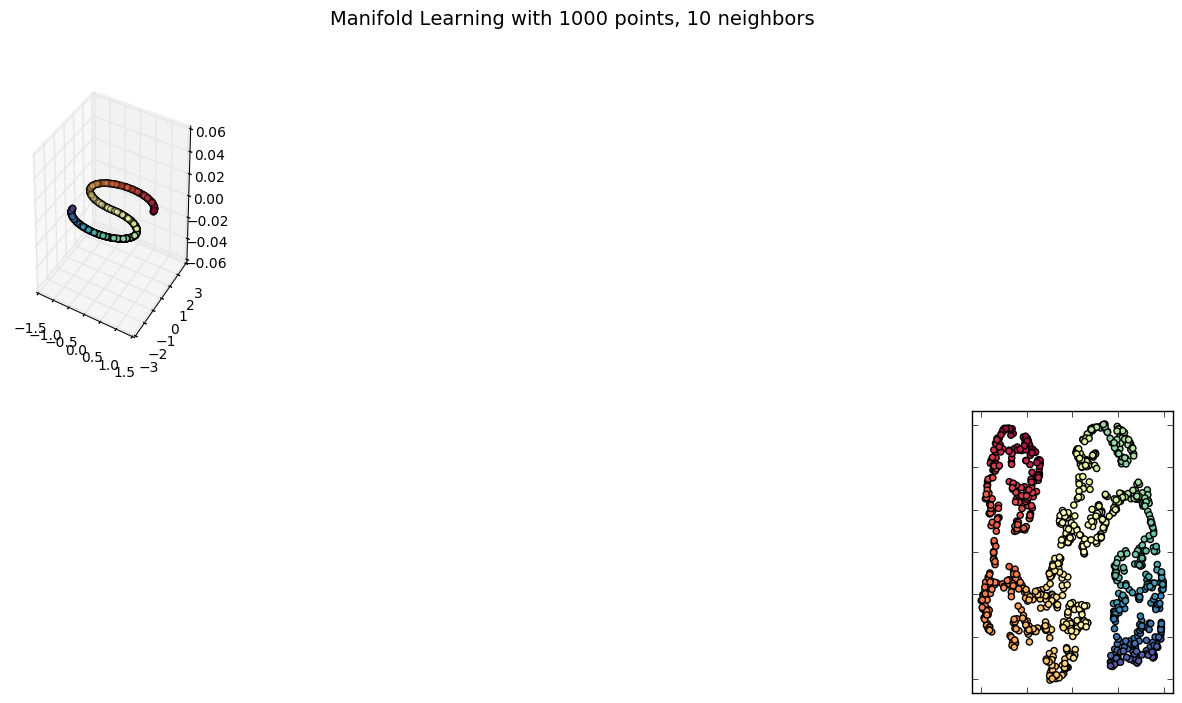

In [18]:
plt.show()